In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

# Pengaturan tampilan pandas
pd.set_option('display.width', 120)
pd.set_option('display.max_columns', 50)

# ====== Load data ======
fp = Path('diabetes.csv')
df = pd.read_csv(fp)

# ====== Inspeksi cepat ======
display(df.head(7))
display(df.tail(7))
print(df.shape)
df.info()
display(df.describe(include='all'))

# Nilai unik beberapa kolom
for c in ['Outcome']:
    print(c, df[c].value_counts(dropna=False).to_dict())

# Cek duplikat baris
n_dup = df.duplicated().sum()
print('Duplikat:', n_dup)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
761,9,170,74,31,0,44.0,0.403,43,1
762,9,89,62,0,0,22.5,0.142,33,0
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


(768, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Outcome {0: 500, 1: 268}
Duplikat: 0


In [ ]:
# Kolom dengan 0 yang tidak realistis (dianggap missing)
suspect_zero_cols = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

for c in suspect_zero_cols:
    df[c] = df[c].replace(0, np.nan)

# Hapus duplikat jika jumlahnya signifikan
df = df.drop_duplicates().reset_index(drop=True)

# Ringkas missing per kolom
missing_pct = df.isna().mean().sort_values(ascending=False)
print("Persentase missing value per kolom:")
print(missing_pct)

# Bisa juga ditampilkan lebih rapi
missing_summary = pd.DataFrame({
    'missing_count': df.isna().sum(),
    'missing_pct': df.isna().mean().round(3)
}).sort_values('missing_pct', ascending=False)

display(missing_summary)

Persentase missing value per kolom:
Insulin                     0.486979
SkinThickness               0.295573
BloodPressure               0.045573
BMI                         0.014323
Glucose                     0.006510
Pregnancies                 0.000000
DiabetesPedigreeFunction    0.000000
Age                         0.000000
Outcome                     0.000000
dtype: float64


,missing_count,missing_pct
Insulin,374,0.487
SkinThickness,227,0.296
BloodPressure,35,0.046
BMI,11,0.014
Glucose,5,0.007
Pregnancies,0,0.000
DiabetesPedigreeFunction,0,0.000
Age,0,0.000
Outcome,0,0.000


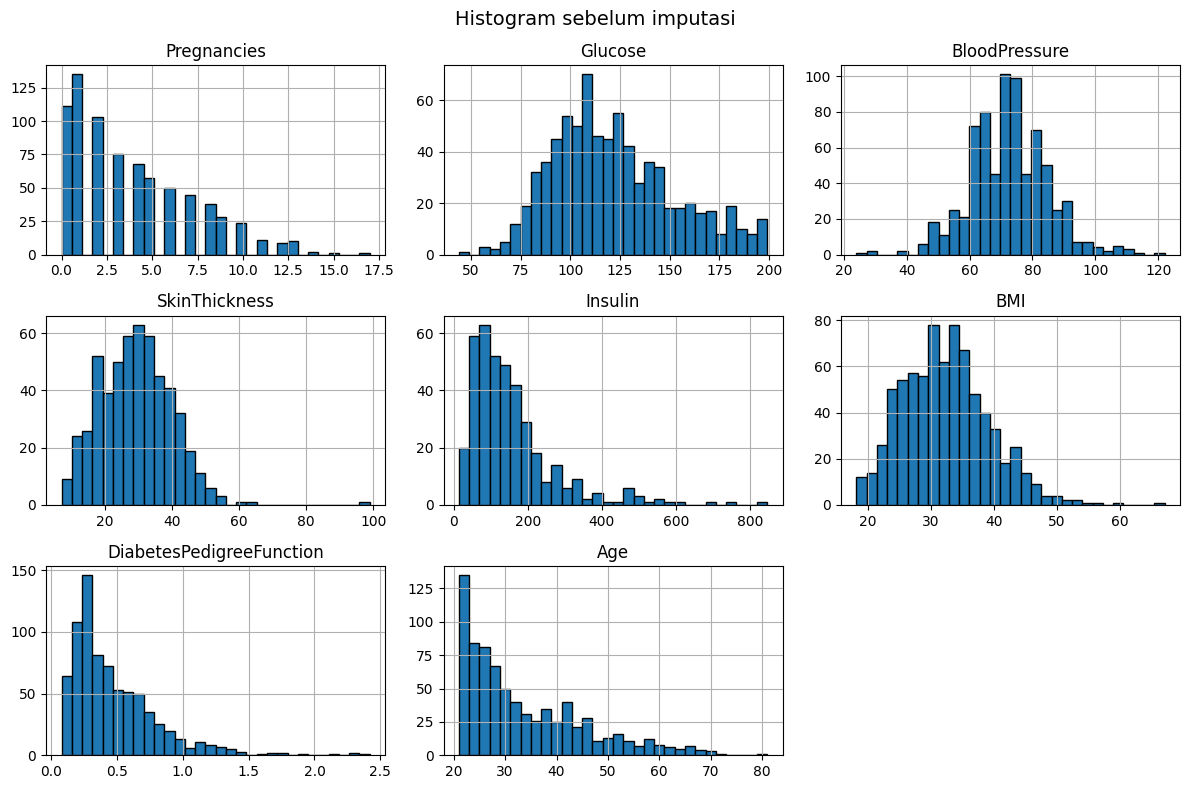

,Q1,Q3,IQR,clip_lower,clip_upper
Pregnancies,1.00000,6.00000,5.0000,-6.500,13.500
Glucose,99.00000,141.00000,42.0000,36.000,204.000
BloodPressure,64.00000,80.00000,16.0000,40.000,104.000
SkinThickness,22.00000,36.00000,14.0000,1.000,57.000
Insulin,76.25000,190.00000,113.7500,-94.375,360.625
BMI,27.50000,36.60000,9.1000,13.850,50.250
DiabetesPedigreeFunction,0.24375,0.62625,0.3825,-0.330,1.200
Age,24.00000,41.00000,17.0000,-1.500,66.500


In [ ]:
# Visual sebelum imputasi untuk melihat sebaran & outlier
num_cols = [c for c in df.columns if c != 'Outcome']

df[num_cols].hist(figsize=(12, 8), bins=30, edgecolor='black')
plt.suptitle('Histogram sebelum imputasi', fontsize=14)
plt.tight_layout()
plt.show()

# Simpan ringkasan IQR untuk clipping (akan dipakai di pipeline juga)
q1 = df[num_cols].quantile(0.25)
q3 = df[num_cols].quantile(0.75)
iqr = q3 - q1

clip_bounds = pd.DataFrame({
    "Q1": q1,
    "Q3": q3,
    "IQR": iqr,
    "clip_lower": q1 - 1.5 * iqr,
    "clip_upper": q3 + 1.5 * iqr
})

display(clip_bounds)

In [ ]:
# ====== Import ======
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import RobustScaler, OneHotEncoder, FunctionTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# ====== Split ======
X = df.drop(columns=['Outcome'])
y = df['Outcome']

X_tr, X_te, y_tr, y_te = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Karena semua fitur Pima numerik
num_features = X_tr.columns.tolist()
cat_features = []  # contoh: ['Gender', 'Smoker'] jika ada

# ====== Fungsi Clipping ======
# Simpan batas dari train
q1 = X_tr[num_features].quantile(0.25)
q3 = X_tr[num_features].quantile(0.75)
iqr = q3 - q1
clip_lower = q1 - 1.5 * iqr
clip_upper = q3 + 1.5 * iqr

def clip_outliers(X):
    """Clip dataframe/array berdasarkan batas IQR dari train."""
    Xc = pd.DataFrame(X, columns=num_features)
    return Xc.clip(lower=clip_lower, upper=clip_upper, axis=1).values

# ====== Preprocessor ======
num_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('clipper', FunctionTransformer(clip_outliers, feature_names_out='one-to-one')),
    ('scaler', RobustScaler())
])

cat_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('ohe', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_pipeline, num_features),
        ('cat', cat_pipeline, cat_features)
    ]
)

# ====== Baseline vs Logistic Regression ======
baseline = Pipeline(steps=[
    ('prep', preprocessor),
    ('clf', DummyClassifier(strategy='most_frequent'))
])

logreg = Pipeline(steps=[
    ('prep', preprocessor),
    ('clf', LogisticRegression(max_iter=1000, class_weight='balanced'))
])

# ====== Training & Evaluasi ======
for name, pipe in [('Baseline', baseline), ('LogReg', logreg)]:
    pipe.fit(X_tr, y_tr)
    yp = pipe.predict(X_te)
    print(f'\n{name}')
    print('Accuracy :', accuracy_score(y_te, yp))
    print(confusion_matrix(y_te, yp))
    print(classification_report(y_te, yp))


Baseline
Accuracy : 0.6493506493506493
[[100   0]
 [ 54   0]]
              precision    recall  f1-score   support

           0       0.65      1.00      0.79       100
           1       0.00      0.00      0.00        54

    accuracy                           0.65       154
   macro avg       0.32      0.50      0.39       154
weighted avg       0.42      0.65      0.51       154


LogReg
Accuracy : 0.7272727272727273
[[74 26]
 [16 38]]
              precision    recall  f1-score   support

           0       0.82      0.74      0.78       100
           1       0.59      0.70      0.64        54

    accuracy                           0.73       154
   macro avg       0.71      0.72      0.71       154
weighted avg       0.74      0.73      0.73       154



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler

pipe_std = Pipeline([
    ('prep', ColumnTransformer([
        ('num', Pipeline([
            ('imputer', SimpleImputer(strategy='median')),
            ('scaler', StandardScaler())
        ]), num_features)
    ])),
    ('clf', LogisticRegression(max_iter=1000, class_weight='balanced'))
])

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(pipe_std, X, y, cv=cv, scoring='accuracy')

print('CV Accuracy mean ± std:', scores.mean(), scores.std())

CV Accuracy mean ± std: 0.7473134708428827 0.04029778337015902
